In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("Creditcard_data.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0 || 1)')

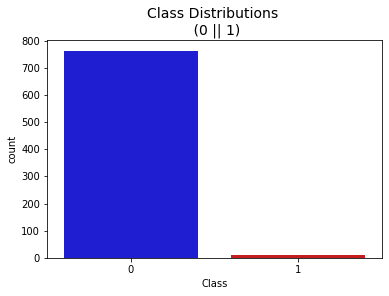

In [4]:
colors = ["#0101EF", "#DF0101"]

sns.countplot('Class', data=data, palette=colors)
plt.title('Class Distributions \n (0 || 1)', fontsize=14)
#We can see that it is heavily baised

In [11]:
import imblearn

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [5]:
y=data["Class"]

In [6]:
x=data[data.columns.drop("Class")]

In [13]:
r1=RandomOverSampler(random_state=42)
x_r1, y_r1 = r1.fit_resample(x, y)
print('Brfore Under sampling', y.value_counts())
print('After Under sampling', y_r1.value_counts())

Brfore Under sampling 0    763
1      9
Name: Class, dtype: int64
After Under sampling 0    763
1    763
Name: Class, dtype: int64


# Random Sampling

In [8]:
import random

In [14]:
x_s1=x_r1.sample(300,random_state=24)
y_s1=y_r1.sample(300,random_state=24)

# Stratified Sampling

In [15]:
x_s2_0=x_r1[y_r1.iloc[:]==0]
x_s2_1=x_r1[y_r1.iloc[:]==1]
y_s2_0=y_r1[y_r1.iloc[:]==0]
y_s2_1=y_r1[y_r1.iloc[:]==1]

In [16]:
x_s2=x_s2_0.sample(100,random_state=24)
x_s2=x_s2.append(x_s2_1.sample(50,random_state=24))
y_s2=y_s2_0.sample(100,random_state=24)
y_s2=y_s2.append(y_s2_1.sample(50,random_state=24))

# SMOTE (Synthetic Minority Oversampling Technique)

In [17]:
from imblearn.over_sampling import SMOTE

In [91]:
oversample = SMOTE()
x_s3, y_s3 = oversample.fit_resample(x, y)

In [92]:
df_smo = pd.DataFrame(np.hstack((x_s3,y_s3[:, None])), columns=data.columns)
df_smo.Class = df_smo.Class.astype(int)
df_smo.head()

<ipython-input-92-0b67dbdd8dff>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_smo = pd.DataFrame(np.hstack((x_s3,y_s3[:, None])), columns=data.columns)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# SMOTE-ENN (Edited Nearest Neighbor) 

In [20]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import cross_validate

In [93]:
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
x_s4 , y_s4 = resample.fit_resample(x,y)

# Systematic Sampling

In [22]:
import math

In [23]:
interval = math.floor(x_r1.shape[0]/150)

start = 10
# Perform systematic sampling
x_s5 = x_r1.iloc[start::interval]
y_s5 = y_r1.iloc[start::interval]

print(x_s5,y_s5)

      Time        V1        V2        V3        V4        V5        V6  \
10      10  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
20      16  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
30      24  1.237429  0.061043  0.380526  0.761564 -0.359771 -0.494084   
40      32  1.249055 -0.624727 -0.710589 -0.991600  1.429973  3.692977   
50      35  1.199356  0.129953  0.863585  1.002635 -0.783761 -0.884679   
...    ...       ...       ...       ...       ...       ...       ...   
1480   472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
1490   406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1500   164  0.073497  0.551033  0.451890  0.114964  0.822947  0.251480   
1510     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
1520   574  1.257719  0.364739  0.306923  0.690638 -0.357792 -1.067481   

            V7        V8        V9  ...       V20       V21       V22  \
10   -1.423236  0.048456 -1.720408  ..

# Sample1

In [95]:
x_s1_accuracy=[]
x_s2_accuracy=[]
x_s3_accuracy=[]
x_s4_accuracy=[]
x_s5_accuracy=[]

In [96]:
X_train=x_s1
y_train=y_s1

X_test=x_r1
y_test=y_r1

#XG BOOST
import xgboost as xgb
from sklearn.model_selection import train_test_split

model = xgb.XGBClassifier(max_depth=5, eta=0.7, objective='multi:softmax', num_class=5, n_estimators=10)
model.fit(X_train,y_train)

predictions = model.predict(X_test)

accuracy = (predictions == y_test).mean()
print("Accuracy1: ", accuracy)
x_s1_accuracy.append(accuracy * 100)

#------------------------------------------

#Desicion Tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print ("Accuracy2: ",accuracy*100)
x_s1_accuracy.append(accuracy * 100)

#------------------------------------------

#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=1000)
clf.fit(X_train, y_train)
SGDClassifier(max_iter=5)

prediction = clf.predict(X_test)
score=clf.score(X_test, y_test)
print ("Accuracy3: ",score*100)
x_s1_accuracy.append(score * 100)

#------------------------------------------

#K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

knn.predict(X_test)

score=knn.score(X_test, y_test)
print ("Accuracy4: ",score*100)
x_s1_accuracy.append(score * 100)

#------------------------------------------

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

score = lr.score(X_test, y_test)
print("Accuracy5:", score*100)
x_s1_accuracy.append(score * 100)



Accuracy1:  0.9796854521625163
Accuracy2:  92.39842726081258
Accuracy3:  47.05111402359109
Accuracy4:  91.74311926605505
Accuracy5: 90.56356487549148


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
x_s1_accuracy

[97.96854521625164,
 92.39842726081258,
 47.05111402359109,
 91.74311926605505,
 90.56356487549148]

# Sample2

In [98]:
X_train=x_s2
y_train=y_s2

X_test=x_r1
y_test=y_r1

#XG BOOST
import xgboost as xgb
from sklearn.model_selection import train_test_split

model = xgb.XGBClassifier(max_depth=5, eta=0.7, objective='multi:softmax', num_class=5, n_estimators=10)
model.fit(X_train,y_train)

predictions = model.predict(X_test)

accuracy = (predictions == y_test).mean()
print("Accuracy1: ", accuracy)
x_s2_accuracy.append(accuracy * 100)

#------------------------------------------

#Desicion Tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print ("Accuracy2: ",accuracy*100)
x_s2_accuracy.append(accuracy * 100)

#------------------------------------------

#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=1000)
clf.fit(X_train, y_train)
SGDClassifier(max_iter=5)

prediction = clf.predict(X_test)
score=clf.score(X_test, y_test)
print ("Accuracy3: ",score*100)
x_s2_accuracy.append(score * 100)

#------------------------------------------

#K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

knn.predict(X_test)

score=knn.score(X_test, y_test)
print("Accuracy4: ",score*100)
x_s2_accuracy.append(score * 100)

#------------------------------------------

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

score = lr.score(X_test, y_test)
print("Accuracy5:", score*100)
x_s2_accuracy.append(score * 100)



Accuracy1:  0.9757536041939712
Accuracy2:  90.1048492791612
Accuracy3:  54.78374836173001
Accuracy4:  83.15858453473133
Accuracy5: 87.48361730013107


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
x_s2_accuracy

[97.57536041939711,
 90.1048492791612,
 54.78374836173001,
 83.15858453473133,
 87.48361730013107]

# Sample3

In [100]:
X_train=x_s3
y_train=y_s3

X_test=x_r1
y_test=y_r1

#XG BOOST
import xgboost as xgb
from sklearn.model_selection import train_test_split

model = xgb.XGBClassifier(max_depth=5, eta=0.7, objective='multi:softmax', num_class=5, n_estimators=10)
model.fit(X_train,y_train)

predictions = model.predict(X_test)

accuracy = (predictions == y_test).mean()
print("Accuracy1: ", accuracy)
x_s3_accuracy.append(accuracy * 100)

#------------------------------------------

#Desicion Tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print ("Accuracy2: ",accuracy*100)
x_s3_accuracy.append(accuracy * 100)

#------------------------------------------

#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=1000)
clf.fit(X_train, y_train)
SGDClassifier(max_iter=5)

prediction = clf.predict(X_test)
score=clf.score(X_test, y_test)
print ("Accuracy3: ",score*100)
x_s3_accuracy.append(score * 100)
#------------------------------------------

#K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

knn.predict(X_test)

score=knn.score(X_test, y_test)
print("Accuracy4: ",score*100)
x_s3_accuracy.append(score * 100)

#------------------------------------------

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

score = lr.score(X_test, y_test)
print("Accuracy5:", score*100)
x_s3_accuracy.append(score * 100)



Accuracy1:  0.9882044560943644
Accuracy2:  96.26474442988204
Accuracy3:  65.92398427260812
Accuracy4:  89.31847968545216
Accuracy5: 94.16775884665793


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
x_s3_accuracy

[98.82044560943643,
 96.26474442988204,
 65.92398427260812,
 89.31847968545216,
 94.16775884665793]

# Sample4

In [102]:
X_train=x_s4
y_train=y_s4

X_test=x_r1
y_test=y_r1

#XG BOOST
import xgboost as xgb
from sklearn.model_selection import train_test_split

model = xgb.XGBClassifier(max_depth=5, eta=0.7, objective='multi:softmax', num_class=5, n_estimators=10)
model.fit(X_train,y_train)

predictions = model.predict(X_test)

accuracy = (predictions == y_test).mean()
print("Accuracy1: ", accuracy)
x_s4_accuracy.append(accuracy * 100)

#------------------------------------------

#Desicion Tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print ("Accuracy2: ",accuracy*100)
x_s4_accuracy.append(accuracy * 100)

#------------------------------------------

#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=1000)
clf.fit(X_train, y_train)
SGDClassifier(max_iter=5)

prediction = clf.predict(X_test)
score=clf.score(X_test, y_test)
print ("Accuracy3: ",score*100)
x_s4_accuracy.append(score * 100)

#------------------------------------------

#K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

knn.predict(X_test)

score=knn.score(X_test, y_test)
print("Accuracy4: ",score*100)
x_s4_accuracy.append(score * 100)

#------------------------------------------

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

score = lr.score(X_test, y_test)
print("Accuracy5:", score*100)
x_s4_accuracy.append(score * 100)



Accuracy1:  0.9403669724770642
Accuracy2:  87.61467889908256
Accuracy3:  74.63958060288336
Accuracy4:  85.25557011795544
Accuracy5: 92.39842726081258


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
x_s4_accuracy

[94.03669724770643,
 87.61467889908256,
 74.63958060288336,
 85.25557011795544,
 92.39842726081258]

# Sample5

In [104]:
X_train=x_s5
y_train=y_s5

X_test=x_r1
y_test=y_r1

#XG BOOST
import xgboost as xgb
from sklearn.model_selection import train_test_split

model = xgb.XGBClassifier(max_depth=5, eta=0.7, objective='multi:softmax', num_class=5, n_estimators=10)
model.fit(X_train,y_train)

predictions = model.predict(X_test)

accuracy = (predictions == y_test).mean()
print("Accuracy1: ", accuracy)
x_s5_accuracy.append(accuracy * 100)

#------------------------------------------

#Desicion Tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print ("Accuracy2: ",accuracy*100)
x_s5_accuracy.append(accuracy * 100)

#------------------------------------------

#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=1000)
clf.fit(X_train, y_train)
SGDClassifier(max_iter=10)

prediction = clf.predict(X_test)
score=clf.score(X_test, y_test)
print ("Accuracy3: ",score*100)
x_s5_accuracy.append(score * 100)

#------------------------------------------

#K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

knn.predict(X_test)

score=knn.score(X_test, y_test)
print("Accuracy4: ",score*100)
x_s5_accuracy.append(score * 100)

#------------------------------------------

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

score = lr.score(X_test, y_test)
print("Accuracy5:", score*100)
x_s5_accuracy.append(score * 100)



Accuracy1:  0.9659239842726082
Accuracy2:  93.25032765399737
Accuracy3:  49.737876802096984
Accuracy4:  85.64875491480997
Accuracy5: 85.3211009174312


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
x_s5_accuracy

[96.59239842726082,
 93.25032765399737,
 49.737876802096984,
 85.64875491480997,
 85.3211009174312]

In [106]:
FinalData=pd.DataFrame(data=(x_s1_accuracy,x_s2_accuracy,x_s3_accuracy,x_s4_accuracy,x_s5_accuracy))

In [107]:
FinalData

,0,1,2,3,4
0,97.968545,92.398427,47.051114,91.743119,90.563565
1,97.575360,90.104849,54.783748,83.158585,87.483617
2,98.820446,96.264744,65.923984,89.318480,94.167759
3,94.036697,87.614679,74.639581,85.255570,92.398427
4,96.592398,93.250328,49.737877,85.648755,85.321101


In [108]:
FinalData=FinalData.transpose()
FinalData

,0,1,2,3,4
0,97.968545,97.575360,98.820446,94.036697,96.592398
1,92.398427,90.104849,96.264744,87.614679,93.250328
2,47.051114,54.783748,65.923984,74.639581,49.737877
3,91.743119,83.158585,89.318480,85.255570,85.648755
4,90.563565,87.483617,94.167759,92.398427,85.321101


In [111]:
FinalData.index=['XG BOOST','Desicion Tree','Stochastic Gradient Descent','K-Nearest Neighbours','Logistic Regression']
FinalData.columns=['Sample1: Random ','Sample2: Stratified','Sample3: SMOTE','Sample4: SMOTE-ENN','Sample5: Systematic']

In [112]:
FinalData

,Sample1: Random,Sample2: Stratified,Sample3: SMOTE,Sample4: SMOTE-ENN,Sample5: Systematic
XG BOOST,97.968545,97.575360,98.820446,94.036697,96.592398
Desicion Tree,92.398427,90.104849,96.264744,87.614679,93.250328
Stochastic Gradient Descent,47.051114,54.783748,65.923984,74.639581,49.737877
K-Nearest Neighbours,91.743119,83.158585,89.318480,85.255570,85.648755
Logistic Regression,90.563565,87.483617,94.167759,92.398427,85.321101
